In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


In [2]:
def plot_predictions(train_data: torch.Tensor,
                     train_labels: torch.Tensor,
                     test_data: torch.Tensor,
                     test_labels: torch.Tensor,
                     predictions: torch.Tensor = None):
    plt.figure(figsize=(5, 4))

    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
        
    plt.legend(prop={"size": 14});

In [3]:
# Build Model
import torch
import torch.nn as nn
class LinearRegressionModel(nn.Module):
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
            requires_grad=True, # <- can we update this value with gradient descent?
            dtype=torch.float # <- PyTorch loves float32 by default
        ))
        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
            requires_grad=True, # <- can we update this value with gradient descent?
            dtype=torch.float # <- PyTorch loves float32 by default
        ))
    def forward(self, x: torch.Tensor):
        y = x * self.weights + self.bias #  as the formula (y = x * w + b)
        return y

In [4]:
data: pd.DataFrame = pd.read_csv("data.csv", index_col=0)
print(data.head())

          y        x1        x2        x3        x4        x5        x6  \
0  7.824944 -0.887890  0.949137  0.867185  0.905457 -0.564753  1.064772   
1 -0.284809  0.402109 -0.109812  0.353789 -0.368996  0.484929 -0.872589   
2 -5.551631 -0.114545 -1.603722  0.284455 -0.276847 -1.421414 -1.135600   
3  0.087262  0.832631  0.443724  0.472880  1.260798  0.589971 -0.150165   
4  0.169201  0.318175 -0.042458  0.014656  0.323378  0.425665  0.268726   

         x7        x8        x9       x10  
0  0.871957  0.073367 -0.468684 -1.518201  
1 -0.305881 -0.284581  0.547374 -0.755235  
2 -0.021529 -0.826239  0.647715 -2.370580  
3  1.148314  1.034029 -0.205375 -0.488831  
4  0.177851 -0.128694  0.110501  0.797469  


In [31]:
data_copy = data.copy()
X = data_copy['x1']
y = data_copy['y']

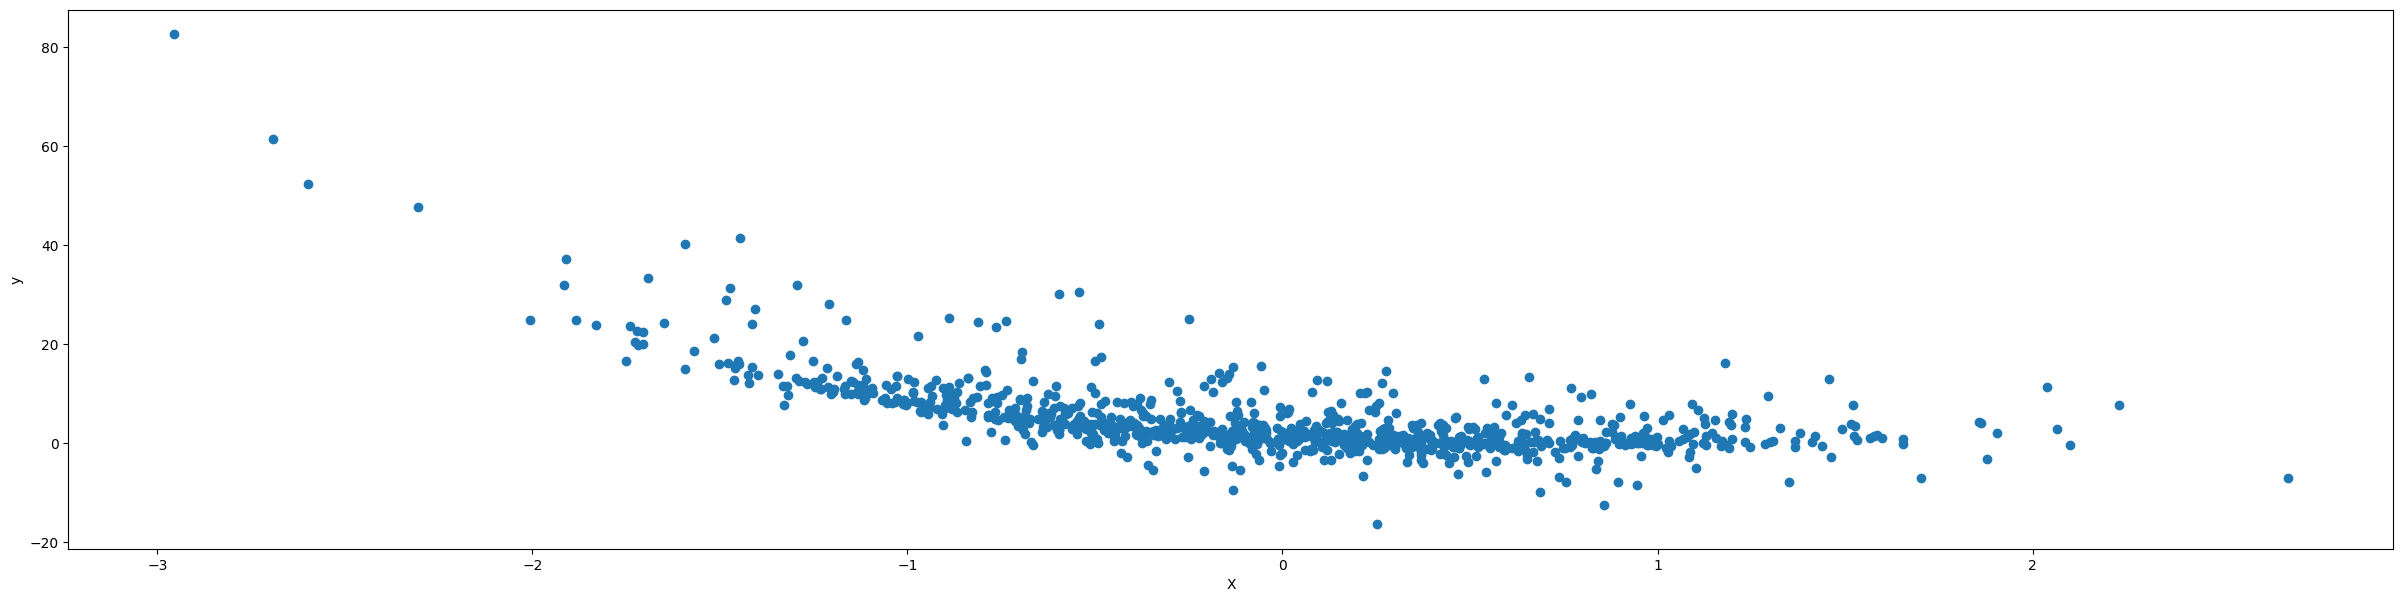

In [32]:
plt.figure(figsize = (30,7))
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

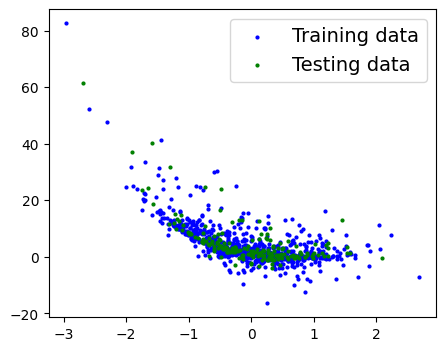

In [43]:
splitter = int(0.8 * len(X))
X_train, y_train = X[:splitter], y[:splitter]
X_test, y_test = X[splitter:], y[splitter:]

#print(f"Train Length: {len(X_train)}")
#print(f"Test Length: {len(X_test)}")


plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test)

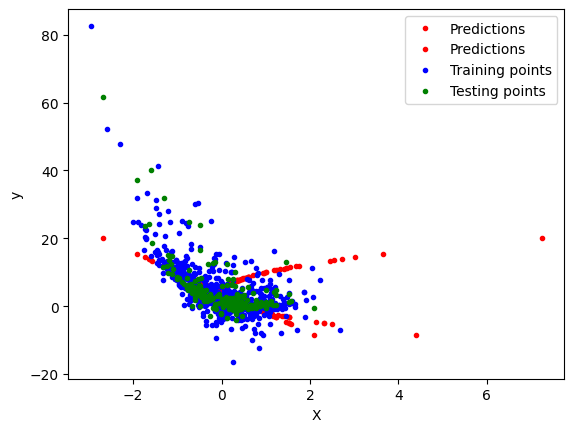

In [34]:
#polynomial model
lr = LinearRegression()
lr.fit(np.array(X_train).reshape(800, 1), y_train) #fit x and y train values
y_pred = lr.predict(np.array(X_test).reshape(200, 1)) #get y predicted values

#print(r2_score(y_test, y_pred)) #


#applying polynomial regression degree 2
poly = PolynomialFeatures(degree=2, include_bias=False)
x_train_trans = poly.fit_transform(np.array(X_train).reshape(800, 1))  #x train transformed to polynomial
x_test_trans = poly.transform(np.array(X_test).reshape(200, 1))        #x test  transformed to polynomial


plt.plot(x_test_trans, y_pred, "r.", label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')


plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()




In [44]:
y_test = torch.tensor(y_test.to_numpy())
print(f"Loss in one parameter: {y_pred[0] - y_test[0]}")

Loss in one parameter: 3.1997625070233426


In [36]:
loss_function = nn.L1Loss() # Mean Absolute Error

In [55]:
y_pred = torch.tensor(y_pred)

for i in y_pred:
  print (i) #iterable!!!!!!!!!
  
optimizer = torch.optim.SGD(y_pred, # model parameters to optimize
                              lr=0.001, # learning rate (how fast the model learns)
                            )

tensor(3.7106, dtype=torch.float64)
tensor(11.6758, dtype=torch.float64)
tensor(5.7341, dtype=torch.float64)
tensor(1.1281, dtype=torch.float64)
tensor(4.7069, dtype=torch.float64)
tensor(2.6238, dtype=torch.float64)
tensor(1.2013, dtype=torch.float64)
tensor(1.1180, dtype=torch.float64)
tensor(11.0560, dtype=torch.float64)
tensor(3.8541, dtype=torch.float64)
tensor(1.6460, dtype=torch.float64)
tensor(1.2517, dtype=torch.float64)
tensor(1.1926, dtype=torch.float64)
tensor(4.7015, dtype=torch.float64)
tensor(3.6126, dtype=torch.float64)
tensor(1.3298, dtype=torch.float64)
tensor(8.3438, dtype=torch.float64)
tensor(1.4608, dtype=torch.float64)
tensor(1.3157, dtype=torch.float64)
tensor(2.7078, dtype=torch.float64)
tensor(1.3335, dtype=torch.float64)
tensor(1.2647, dtype=torch.float64)
tensor(1.5653, dtype=torch.float64)
tensor(6.6838, dtype=torch.float64)
tensor(4.1938, dtype=torch.float64)
tensor(5.6874, dtype=torch.float64)
tensor(4.2134, dtype=torch.float64)
tensor(3.7462, dtype=torch

C:\Users\Hp\AppData\Local\Temp\ipykernel_9840\3848447231.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_pred = torch.tensor(y_pred)


TypeError: params argument given to the optimizer should be an iterable of Tensors or dicts, but got torch.DoubleTensor

In [38]:
def train(
        model: nn.Module,
        train_data: torch.Tensor,
        train_labels: torch.Tensor,
        test_data: torch.Tensor,
        test_labels: torch.Tensor,
        loss_function: nn.Module,
        optimizer: torch.optim.Optimizer,
        epochs: int,
    ):
    epochs_count ,train_loss_arr, test_loss_arr = [], [], []
    for epoch in range(epochs+1):
        model.train()
        y_pred = model(train_data)
        loss = loss_function(y_pred, train_labels)
        loss.backward()

        optimizer.step()
        optimizer.zero_grad()

        model.eval()
        with torch.inference_mode():
            y_pred = model(test_data)
            test_loss = loss_function(y_pred, test_labels)

        if epoch % 10 == 0:
            epochs_count.append(epoch)
            train_loss_arr.append(loss.detach().numpy())
            test_loss_arr.append(test_loss.detach().numpy())
            print(f"Epoch {epoch}: MAE Loss: {loss.item():0.2f} | Test Loss: {test_loss.item():0.2f}")
    return epochs_count, train_loss_arr, test_loss_arr


In [56]:
x_train_trans = torch.tensor(x_train_trans)
y_train = torch.tensor(y_train)
x_test_trans  =torch.tensor(x_test_trans)
y_test = torch.tensor(np.array(y_test))


epochs_count, train_loss, test_loss = train(
                                        y_pred, 
                                        train_data=x_train_trans, 
                                        train_labels=y_train, 
                                        test_data=x_test_trans, 
                                        test_labels=y_test, 
                                        loss_function=loss_function, 
                                        optimizer=optimizer, 
                                        epochs=1000
                                    )

AttributeError: 'Tensor' object has no attribute 'train'

In [40]:
def plot_stats(
        epochs: list,
        train_loss: list,
        test_loss: list,
    ):
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, train_loss, label='Train loss')
    plt.plot(epochs, test_loss, label='Test loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    
plot_stats(epochs_count, train_loss, test_loss)



NameError: name 'epochs_count' is not defined

In [ ]:
def predict(model, X):
    with torch.inference_mode():
        y_pred = model(X)
        return y_pred

In [ ]:
y_preds = predict(y_pred, x_test_trans)

ValueError: x and y must be the same size

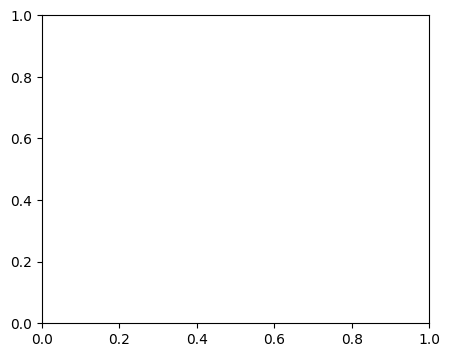

In [ ]:
plot_predictions(
    train_data=x_train_trans,
    train_labels=y_train,
    test_data=x_test_trans,
    test_labels=y_test,
    predictions=y_preds,
)

#MODEL 2

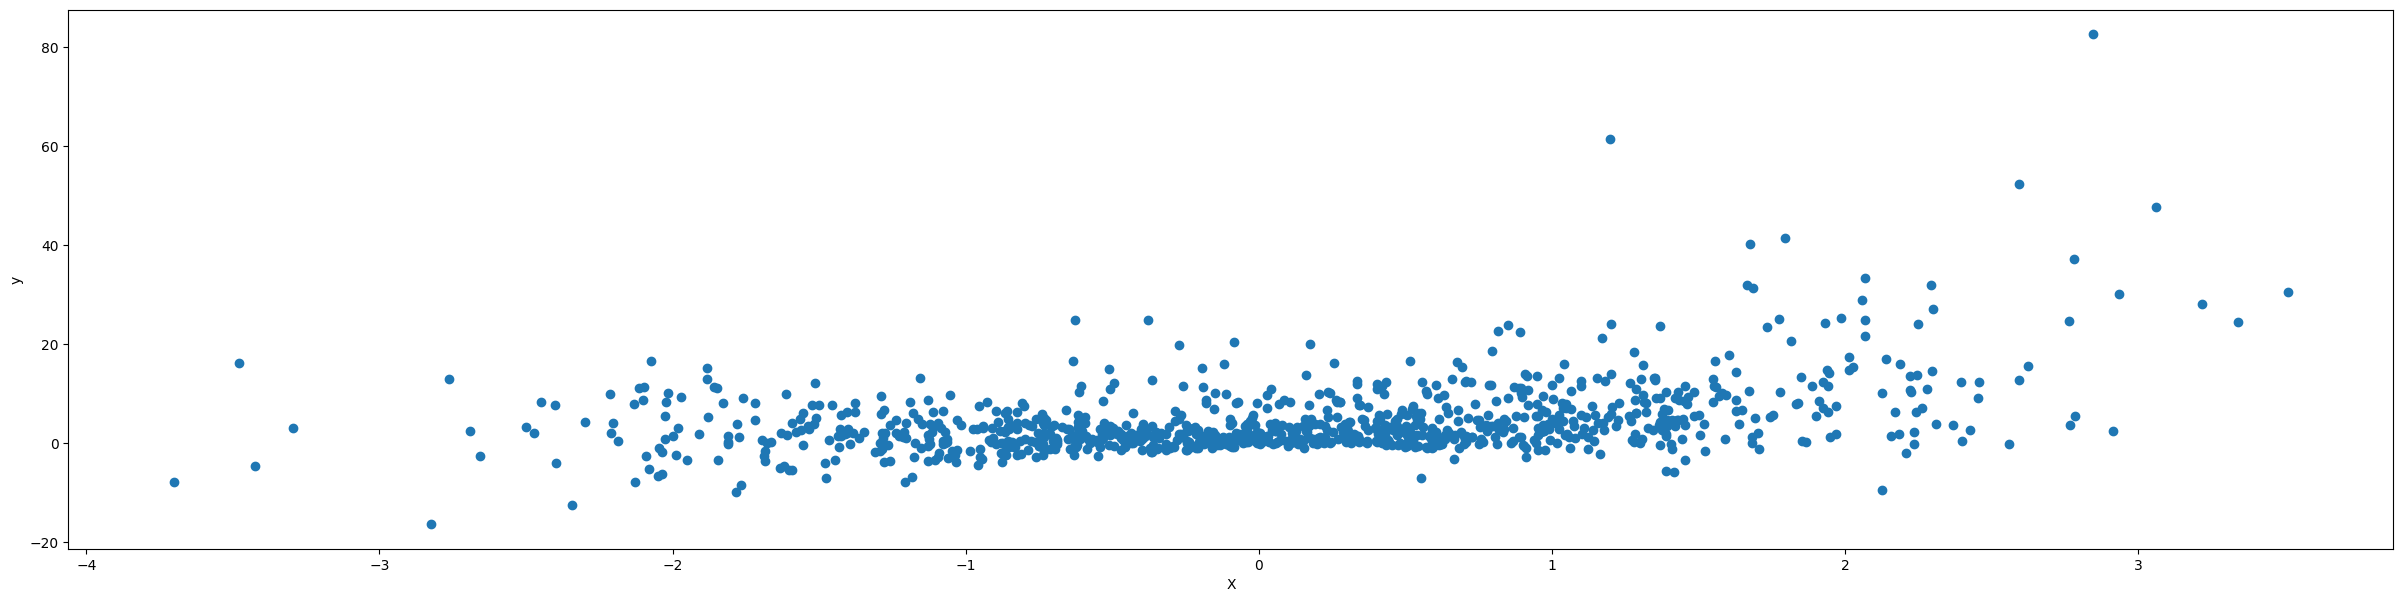

In [50]:
data_copy = data.copy()
X = data_copy['x2']
y = data_copy['y']

plt.figure(figsize = (30,7))
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

yyyyyyyyy test 
800     3.325631
801    24.170336
802     5.378020
803     0.865511
804     0.747374
         ...    
995     0.284998
996    -0.064230
997     0.852619
998    16.528922
999     5.670538
Name: y, Length: 200, dtype: float64


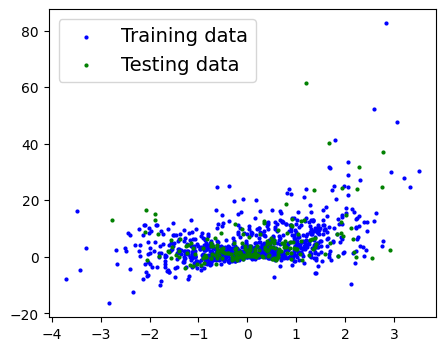

In [51]:
splitter = int(0.8 * len(X))
X_train, y_train = X[:splitter], y[:splitter]
X_test, y_test = X[splitter:], y[splitter:]

#print(f"Train Length: {len(X_train)}")
#print(f"Test Length: {len(X_test)}")


print(f"yyyyyyyyy test \n{y_test}")


plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test)

ssr:   0.2100087294119095
[0.         2.57439707 1.08877846]
2.634260742434063
yyyyyyyy neww
4.710075642953855


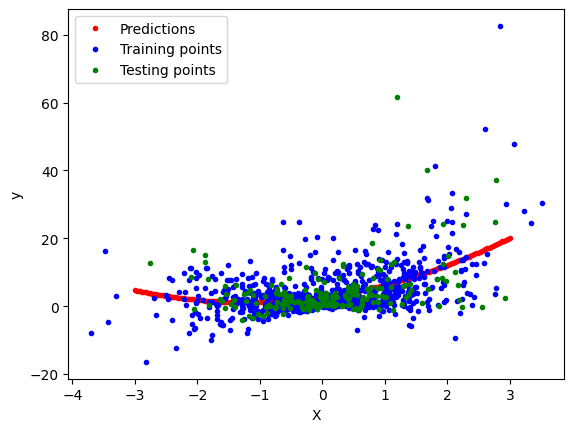

In [52]:
#polynomial model
lr = LinearRegression()
lr.fit(np.array(X_train).reshape(-1, 1), y_train)
y_pred = lr.predict(np.array(X_test).reshape(-1, 1))
#print(r2_score(y_test, y_pred)) #??????????


#applying polynomial regression degree 2
poly = PolynomialFeatures(degree=2, include_bias=True)
x_train_trans = poly.fit_transform(np.array(X_train).reshape(-1, 1))  #x train transformed to polynomial
x_test_trans = poly.transform(np.array(X_test).reshape(-1, 1))        #x test  transformed to polynomial

#include bias parameter
lr = LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans) #predicted y value after transforming x to polynomial
print(f"ssr:   {r2_score(y_test, y_pred)}") #evaluate performance of the model //SSR


print(lr.coef_)
print(lr.intercept_)


X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)


plt.plot(X_new, y_new, "r.", label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')


plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

MODEL 3

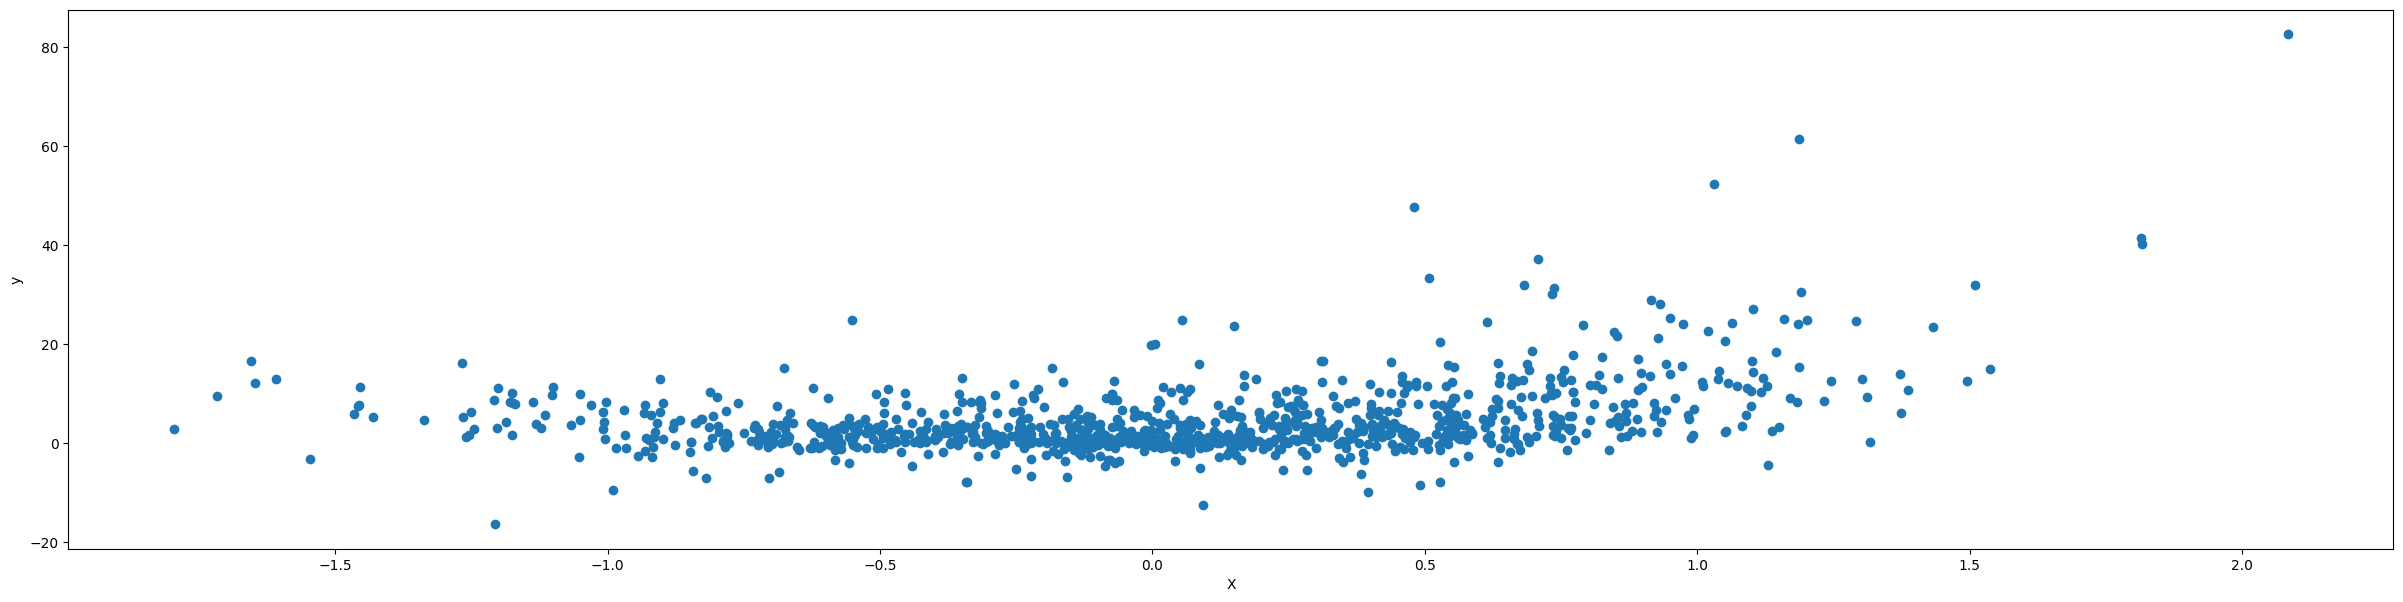

In [76]:
data_copy = data.copy()
X = data_copy['x3']
y = data_copy['y']


plt.figure(figsize = (30,7))
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

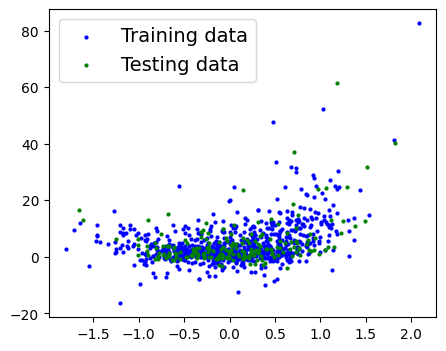

In [77]:
splitter = int(0.8 * len(X))
X_train, y_train = X[:splitter], y[:splitter]
X_test, y_test = X[splitter:], y[splitter:]

#print(f"Train Length: {len(X_train)}")
#print(f"Test Length: {len(X_test)}")



plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test)

ssr:   0.3330798567436274
[0.         4.53442222 6.32100566]
1.8805924085055903
yyyyyyyy neww
45.16637671623585


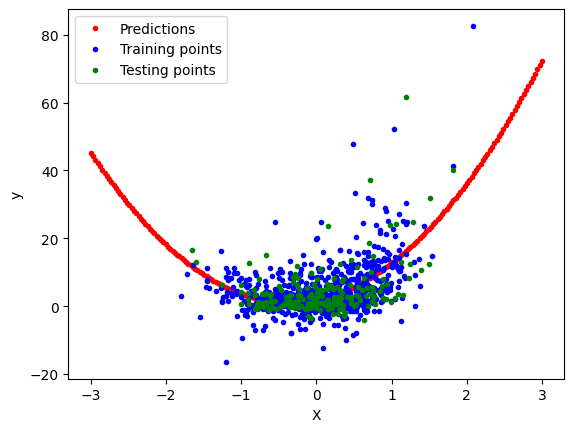

In [78]:
#polynomial model
lr = LinearRegression()
lr.fit(np.array(X_train).reshape(800, 1), y_train)
y_pred = lr.predict(np.array(X_test).reshape(200, 1))



#applying polynomial regression degree 2
poly = PolynomialFeatures(degree=2, include_bias=True)
x_train_trans = poly.fit_transform(np.array(X_train).reshape(-1, 1))  #x train transformed to polynomial
x_test_trans = poly.transform(np.array(X_test).reshape(-1, 1))        #x test  transformed to polynomial

#include bias parameter
lr = LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans) #predicted y value after transforming x to polynomial
print(f"ssr:   {r2_score(y_test, y_pred)}") #evaluate performance of the model //SSR


print(lr.coef_)
print(lr.intercept_)


X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

print(f"yyyyyyyy neww\n{y_new[0]}")

#plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_new, y_new, "r.", label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')

#print(f"yyyyyy test: {y_test[0]}")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

MODEL 4

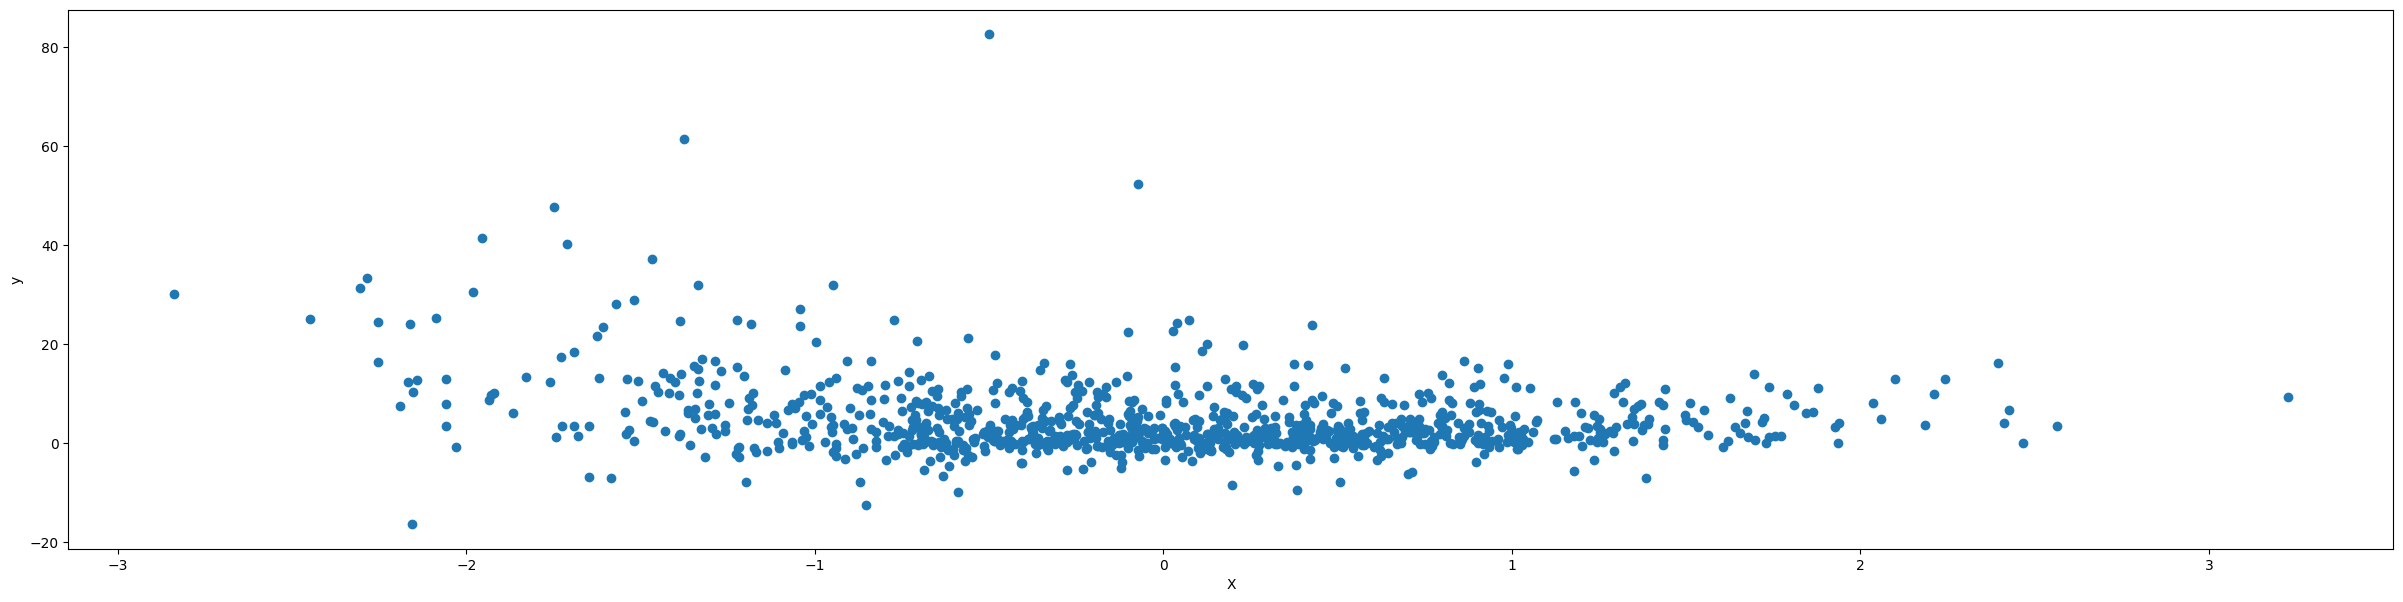

In [79]:
data_copy = data.copy()
X = data_copy['x4']
y = data_copy['y']


plt.figure(figsize = (30,7))
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

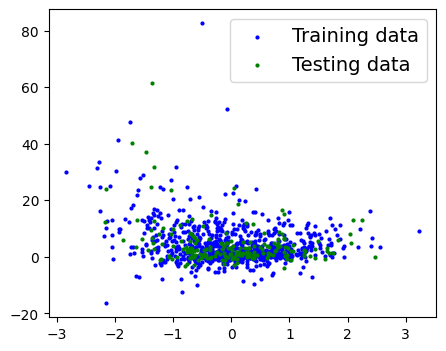

In [81]:
splitter = int(0.8 * len(X))
X_train, y_train = X[:splitter], y[:splitter]
X_test, y_test = X[splitter:], y[splitter:]

#print(f"Train Length: {len(X_train)}")
#print(f"Test Length: {len(X_test)}")



plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test)

ssr:   0.1760630873871597
[ 0.         -1.75402497  1.80535364]
2.910252206252749


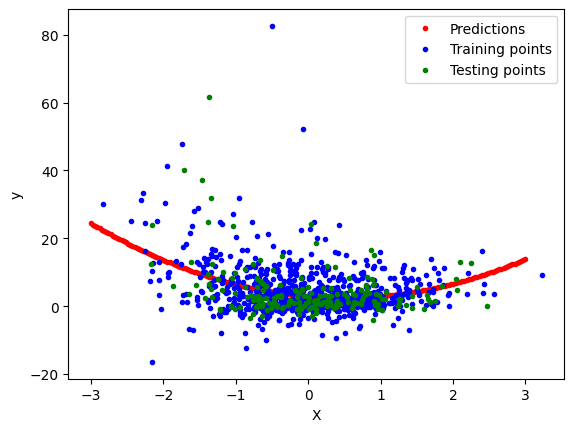

In [84]:
#polynomial model
lr = LinearRegression()
lr.fit(np.array(X_train).reshape(800, 1), y_train)
y_pred = lr.predict(np.array(X_test).reshape(200, 1))
#print(r2_score(y_test, y_pred)) 


#applying polynomial regression degree 2
poly = PolynomialFeatures(degree=2, include_bias=True)
x_train_trans = poly.fit_transform(np.array(X_train).reshape(-1, 1))  #x train transformed to polynomial
x_test_trans = poly.transform(np.array(X_test).reshape(-1, 1))        #x test  transformed to polynomial

#include bias parameter
lr = LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans) #predicted y value after transforming x to polynomial
print(f"ssr:   {r2_score(y_test, y_pred)}") #evaluate performance of the model //SSR


print(lr.coef_)
print(lr.intercept_)


X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)


plt.plot(X_new, y_new, "r.", label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')

plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

MODEL 5

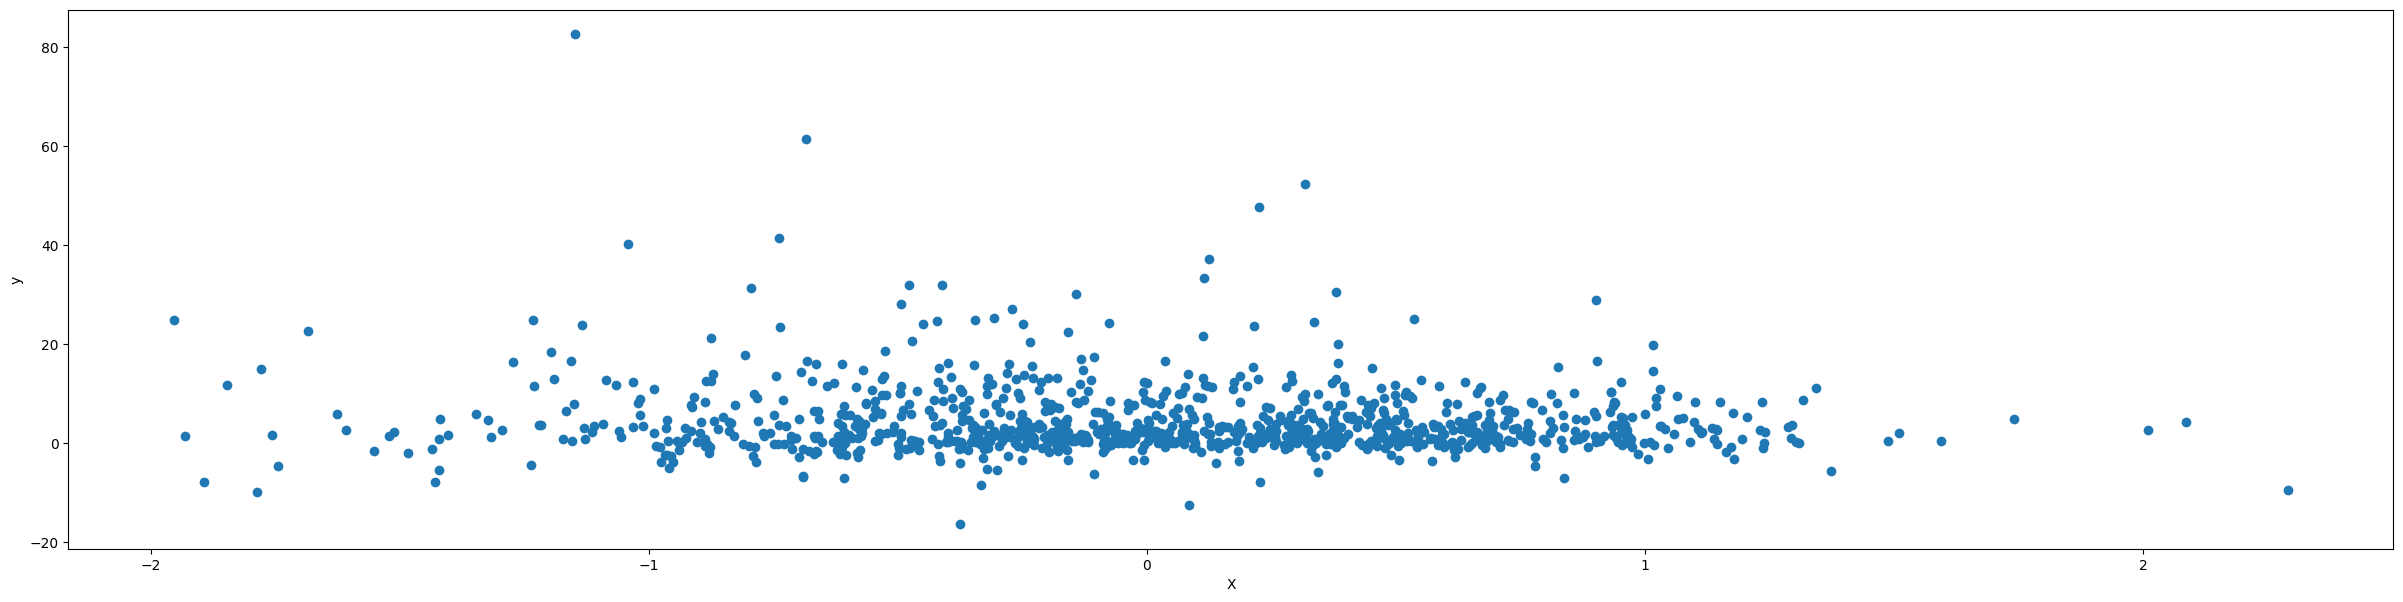

In [85]:
data_copy = data.copy()
X = data_copy['x5']
y = data_copy['y']


plt.figure(figsize = (30,7))
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

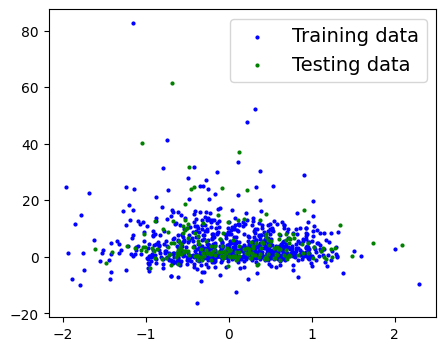

In [87]:
splitter = int(0.8 * len(X))
X_train, y_train = X[:splitter], y[:splitter]
X_test, y_test = X[splitter:], y[splitter:]

#print(f"Train Length: {len(X_train)}")
#print(f"Test Length: {len(X_test)}")



plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test)

Model_0 Parameters: [Parameter containing:
tensor([-0.5619], requires_grad=True), Parameter containing:
tensor([-0.2814], requires_grad=True)]
Named Parameters: OrderedDict([('weights', tensor([-0.5619])), ('bias', tensor([-0.2814]))])
Predicted value: tensor([-0.6099, -0.2392, -0.5075, -0.1541, -0.2523, -0.2070, -0.5307, -0.5008,
         0.2921, -0.2482, -0.4950, -0.6955, -0.9185,  0.5071,  0.2164,  0.1389,
        -0.0066, -1.0046, -0.3358, -0.5338, -0.1655, -0.5495, -0.7168, -0.4922,
         0.2868,  0.2397, -0.5717, -0.6265, -0.2780,  0.0255, -0.1181, -0.1019,
        -0.4389, -0.1358, -0.4692,  0.2746, -0.5361, -0.6944,  0.0676, -0.6067,
        -1.0365, -0.4885, -0.0429, -0.2259,  0.1679, -0.4091, -0.5379,  0.1111,
         0.4047, -0.2373, -0.1830, -0.2330, -0.0731,  0.2025,  0.0531, -0.2097,
        -0.0451,  0.3040,  0.0429, -0.6679,  0.5517, -0.3533,  0.0180,  0.2226,
        -0.0723, -0.1284, -0.0742,  0.2537, -0.6710,  0.0168, -0.9077,  0.0545,
        -0.0036,  0.0441, -

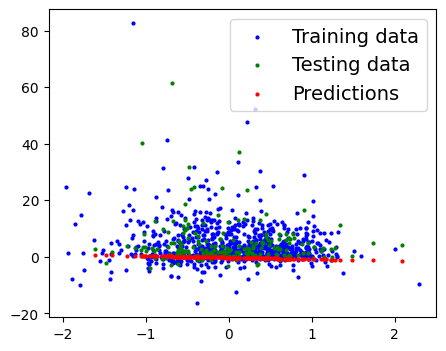

In [88]:

model_0 = LinearRegressionModel()
print(f"Model_0 Parameters: {list(model_0.parameters())}")

print(f"Named Parameters: {model_0.state_dict()}")



# Predict
with torch.inference_mode(): 
    X_test = torch.tensor(X_test.to_numpy())
    y_preds = model_0(X_test)

print(f"Predicted value: {y_preds}")



plot_predictions(X_train, y_train, X_test, y_test, y_preds)

In [89]:
y_test = torch.tensor(y_test.to_numpy())
y_preds = torch.tensor(y_preds)
print(f"Difference between labeled data and predictions {y_test - y_preds}")


print(f"Loss in one parameter: {y_preds[0] - y_test[0]}")

loss_function = nn.L1Loss() # Mean Absolute Error

optimizer = torch.optim.SGD(model_0.parameters(), # model parameters to optimize
                              lr=0.001, # learning rate (how fast the model learns)
                            )



Difference between labeled data and predictions tensor([ 3.9355e+00,  2.4410e+01,  5.8855e+00,  1.0196e+00,  9.9971e-01,
         1.9164e+00,  2.3431e-01,  3.7335e+00,  7.6737e+00,  2.4056e+00,
         1.3464e+01,  6.8977e+00,  3.9595e+00,  1.1622e+00,  1.2285e+01,
        -4.0775e-01,  6.6320e+00,  4.2328e+00, -2.0630e-01,  7.5056e+00,
         1.3098e+00,  6.5431e+00,  8.7268e+00,  1.3859e+00,  3.2113e+00,
         2.8522e+00,  6.1832e+00,  3.2487e+00, -3.0908e+00,  8.3539e+00,
         3.9283e-01, -8.6217e-01,  1.7520e+00,  1.3204e+00,  5.5007e+00,
         1.7337e+00,  5.5997e-01,  9.1213e-01,  1.3810e+00,  1.3306e+00,
         1.2131e+01,  2.7818e-01,  3.4258e+00,  6.4259e+00, -8.8465e-01,
         3.4846e+00,  8.6299e+00,  4.7100e+00,  3.2646e+00,  4.1692e+00,
         2.7287e+00,  6.0877e-01,  5.6689e+00,  2.5742e+00,  5.6460e+00,
         1.4912e+01,  2.4736e+01,  3.9855e+01,  4.4286e+00,  8.8898e+00,
        -2.6035e+00,  5.1457e-01,  1.6806e+00,  1.7496e+00,  1.8904e-01,
   

C:\Users\Hp\AppData\Local\Temp\ipykernel_9840\3622933003.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_preds = torch.tensor(y_preds)


In [90]:
def train(
        model: nn.Module,
        train_data: torch.Tensor,
        train_labels: torch.Tensor,
        test_data: torch.Tensor,
        test_labels: torch.Tensor,
        loss_function: nn.Module,
        optimizer: torch.optim.Optimizer,
        epochs: int,
    ):
    epochs_count ,train_loss_arr, test_loss_arr = [], [], []
    for epoch in range(epochs+1):
        model.train()
        y_pred = model(train_data)
        loss = loss_function(y_pred, train_labels)
        loss.backward()

        optimizer.step()
        optimizer.zero_grad()

        model.eval()
        with torch.inference_mode():
            y_pred = model(test_data)
            test_loss = loss_function(y_pred, test_labels)

        if epoch % 10 == 0:
            epochs_count.append(epoch)
            train_loss_arr.append(loss.detach().numpy())
            test_loss_arr.append(test_loss.detach().numpy())
            print(f"Epoch {epoch}: MAE Loss: {loss.item():0.2f} | Test Loss: {test_loss.item():0.2f}")
    return epochs_count, train_loss_arr, test_loss_arr


In [91]:
X_train = torch.tensor(X_train)
y_train = torch.tensor(y_train)
X_test  =torch.tensor(X_test)
y_test = torch.tensor(y_test)


epochs_count, train_loss, test_loss = train(
                                        model_0, 
                                        train_data=X_train, 
                                        train_labels=y_train, 
                                        test_data=X_test, 
                                        test_labels=y_test, 
                                        loss_function=loss_function, 
                                        optimizer=optimizer, 
                                        epochs=1000
                                    )

C:\Users\Hp\AppData\Local\Temp\ipykernel_9840\2313109918.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test  =torch.tensor(X_test)
C:\Users\Hp\AppData\Local\Temp\ipykernel_9840\2313109918.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test = torch.tensor(y_test)


Epoch 0: MAE Loss: 5.37 | Test Loss: 4.98
Epoch 10: MAE Loss: 5.37 | Test Loss: 4.98
Epoch 20: MAE Loss: 5.36 | Test Loss: 4.97
Epoch 30: MAE Loss: 5.36 | Test Loss: 4.97
Epoch 40: MAE Loss: 5.36 | Test Loss: 4.96
Epoch 50: MAE Loss: 5.35 | Test Loss: 4.96
Epoch 60: MAE Loss: 5.35 | Test Loss: 4.95
Epoch 70: MAE Loss: 5.34 | Test Loss: 4.95
Epoch 80: MAE Loss: 5.34 | Test Loss: 4.94
Epoch 90: MAE Loss: 5.33 | Test Loss: 4.94
Epoch 100: MAE Loss: 5.33 | Test Loss: 4.93
Epoch 110: MAE Loss: 5.32 | Test Loss: 4.93
Epoch 120: MAE Loss: 5.32 | Test Loss: 4.92
Epoch 130: MAE Loss: 5.32 | Test Loss: 4.92
Epoch 140: MAE Loss: 5.31 | Test Loss: 4.91
Epoch 150: MAE Loss: 5.31 | Test Loss: 4.91
Epoch 160: MAE Loss: 5.30 | Test Loss: 4.90
Epoch 170: MAE Loss: 5.30 | Test Loss: 4.90
Epoch 180: MAE Loss: 5.29 | Test Loss: 4.89
Epoch 190: MAE Loss: 5.29 | Test Loss: 4.89
Epoch 200: MAE Loss: 5.28 | Test Loss: 4.88
Epoch 210: MAE Loss: 5.28 | Test Loss: 4.88
Epoch 220: MAE Loss: 5.28 | Test Loss: 4.87

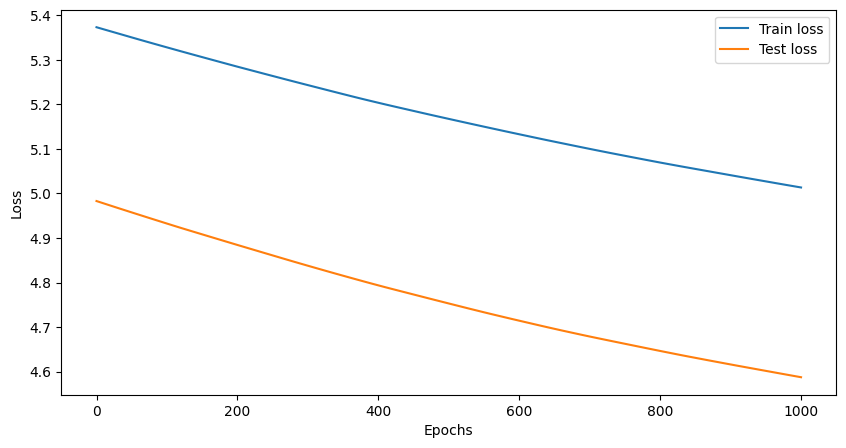

In [92]:
def plot_stats(
        epochs: list,
        train_loss: list,
        test_loss: list,
    ):
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, train_loss, label='Train loss')
    plt.plot(epochs, test_loss, label='Test loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    

plot_stats(epochs_count, train_loss, test_loss)

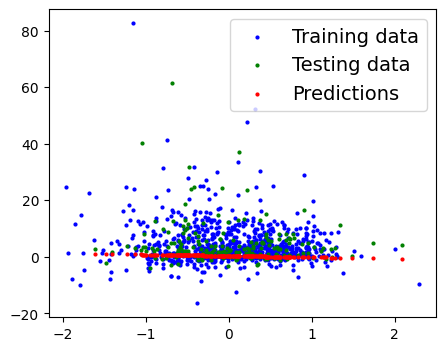

In [93]:
def predict(model, X):
    with torch.inference_mode():
        y_pred = model(X)
        return y_pred
    
    
y_preds = predict(model_0, X_test)

plot_predictions(
    train_data=X_train,
    train_labels=y_train,
    test_data=X_test,
    test_labels=y_test,
    predictions=y_preds,
)